## Univariate Investment Risk and Returns


### A Tale of Two Returns
The fundamentals of investment risk and financial return distributions.
- Two types of return

  1.   Discrete return (simple returns)
         are the most commonly used, and represent periodic (e.g. daily, weekly and<br> represent periodic (e.g. daily, weekly monthly, etc.) price movements
  2.   Log returns <br>
  Are often used inacademic research and financialmodeling. They assume <b>continuous compounding.</b>
<img src='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Pyfin/Images/DiscreteLog.png'>

## Calculating Stock Returns

*   Discrete returns <br>
Discrete returns are calculated as the change in price as a percentage of the previous period’s price
<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/DiscreateReturn.png?raw=true" >

*  Calculating Log Returns<br>
Log returns are calculated as the difference between the log of two
prices<br>Log returns aggregate across time, while discrete returns aggregate
across assets
<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/LogReturn.png?raw=true" >


















In [1]:
#Calculating return of Micrsofot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
MSFT_url ='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Finance/MSFTPrices.csv'

In [3]:
MSFT_prices = pd.read_csv(MSFT_url,parse_dates=True)
MSFT_prices.sort_values(by='Date',inplace=True)

In [4]:
MSFT_prices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [5]:
MSFT_prices['return']= MSFT_prices['Adjusted'].pct_change()
print(MSFT_prices.head())

         Date    Open    High     Low     Close    Volume   Adjusted    return
0  2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1  2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2  2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3  2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4  2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


###Return distributions
In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

<p>You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

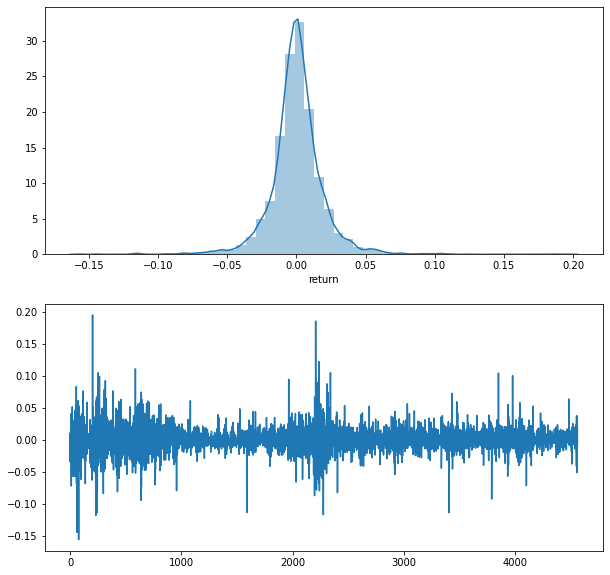

In [6]:
Figure = plt.figure(figsize=(10,10))
ax1 = Figure.add_subplot(2,1,1)
sns.distplot(a=MSFT_prices['return'],ax=ax1)
ax2 = Figure.add_subplot(2,1,2)
MSFT_prices['return'].plot(ax=ax2)##sns.lineplot(x='Date',y='return',data=MSFT_prices,ax=ax2)

**Moments of Distributions**


1. Mean (μ)
2. Variance (σ <sup>2</sup>)
3. Skewness : Tilt of the distribution
4. Kurtosis : Measure  Fatness of the tail

### The Normal Distribution

There are many types of distributions.
Some are normal and some are nonnormal. A random variable with a
Gaussian distribution is said to be
normally distributed. Normal Distributions have the following
properties:
1. Mean (μ)
2. Variance (σ <sup>2</sup>)
3. Skewness : Tilt of the distribution = 0
4. Kurtosis : Measure  Fatness of the tail = 3<br>
<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/NormalDistribution.JPG?raw=true">

 

*  The Standard Normal Distribution
  *   The Standard Normal is a special case of the Normal Distribution when:
      * σ = 1
      * μ = 0
    
### Comparing Against a Normal Distribution
* Normal distributions have a skewness near 0 and a kurtosis near 3
* Financial returns tend not to be normally distributed
* Financial returns can have high kurtosis.

<img src ="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/IBM_NormalComparision.JPG?raw=true">

- Test of normality can also be used, like Shapiro–Wilk test and Jarque-Bera test <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/'> read more here</a> Anyway, High Kurtosis and or large skewness is symbol or non-normal distribution.

### First moment: Mu
When you are calculating the average daily return of a stock, you are essentially estimating the first moment ( μ ) of the historical returns distribution.But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):

* Average Annualized Return=((1+μ)<sup>252</sup>)−1

### Standard Deviation and Variance:(Second moment: Variance)
* Variance = σ
* Often represented in mathematical notation as σ, or referred to as volatility
An investment with higher σ is viewedas a higher risk investment Measures the dispersion of returns<br>

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or variance of a return distribution using numpy.In this case, you will first need to calculate the daily standard deviation ( σ ), or volatility of the returns using np.std(). The variance is simply σ<sup>2</sup>.


<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/SDn%20Normal.JPG?raw=true">

### Scaling Volatility
* Volatility scales with the square root of time
* You can normally assume 252 trading days in a given year, and 21 trading days in a given month

<img src="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/vol_for.JPG?raw=true">




In [7]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(MSFT_prices['return'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.00037777546435757725
0.09985839482858783


Nice! The average daily return of the stock (mu) is 0.04% per day. This works out to an annualized return of 9.99% per year.

In [10]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(MSFT_prices['return'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708328
0.0003740781650197374


Good! The average daily volatility of the stock (sigma) is 1.93% per day. The average daily variance of the stock (the second moment) is 0.04%.

In [11]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


Awesome! This works out to an annualized volatility (sigma) of 30.7% per year. And an annualized variance of 9.43% per year

### Skewness : Skewness is the third moment of a distribution.
* Negative Skew: The mass of the distribution is concentrated on the right. Usually a right-leaning curve
* Positive Skew: The mass of the distribution is concentrated on the left.
Usually a left-leaning curve
* In finance, you would tend to want
positive skewness

<img src ="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Skewness.JPG?raw=true">

- Note that the skewness is higher than 0 in this example, suggesting non-normality

### Kurtosis: Kurtosis is a measure of the thickness of the tails of a distribution
* Most financial returns are leptokurtic
* Leptokurtic distributions are distributions with kurtosis larger than that of a normal distribution. A normal distribution has kurtosis of three.
* Excess Kurtosis: Subtract 3 from the sample kurtosis to calculate “Excess
Kurtosis”

- can be used as proxy for probability of outliers.
<img src ="https://github.com/iqbalamo93/Datasets/blob/master/Pyfin/Images/Kurtosis.JPG?raw=true">

- Note the <b>excess kurtosis</b> greater than 0 in this example, suggesting non-normality.

- high kurtosis distributions are thick tails

PS: If we use -from scipy.stats import kurtosis
In Fisher’s definiton, the kurtosis of the normal distribution is zero. In the following example, the kurtosis is close to zero, because it was calculated from the dataset, not from the continuous distribution. Add +3 to get sample kurtosis.


### Test of normality
- If skweness is not equal to zero and excess kurtosis is also not zero, we can say distribution is not normal.
- what if values are close to zero but not equal to?

- Here comes- Shapiro-Wilk test.

The null hypothesis of the Shapiro-Wilk test is that the data are normally
distributed. Example done below:



In [17]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = MSFT_prices['return'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067852


The third moment (skewness) of the stock returns is 0.22. A normal distribution would have a skewness much closer to 0.

In [18]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(fourth_moment)

10.31457261802553
13.31457261802553


 The fourth moment (kurtosis) of the stock returns is 13.31 with an excess kurtosis of 10.31. A normal distribution would tend to have a kurtosis of 3, and an excess kurtosis of 0

In [19]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0


 The p-value is 0, so null hypothesis of normality is rejected. The data are non-normal.